<a href="https://colab.research.google.com/github/sayevvv/PBL_MoneyClassification/blob/main/PBL_SVMV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skrip Google Colab V3: Melatih Model SVM (8 Kelas)
Menggunakan fitur V3 yang mencakup kelas negatif '0_bukan_uang'.

In [1]:
import os
import cv2
import joblib
import numpy as np
from tqdm import tqdm
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


# KONFIGURASI

In [4]:
BASE_DIR = '/content/drive/MyDrive/tugas_akhir_semester5/raw_data'
# Pastikan urutan LABELS ini SAMA PERSIS dengan preprocess_dataset_v3.py
LABELS = ['negative', '1000', '2000', '5000', '10000', '20000', '50000', '100000']
VALID_EXTENSIONS = ('.jpg', '.jpeg', '.png')

PATH_X = os.path.join(BASE_DIR, 'features_X_v3.joblib')
PATH_Y = os.path.join(BASE_DIR, 'labels_y_v3.joblib')

# 2. LOAD DATA & KUMPULKAN PATH GAMBAR

In [5]:
print("Memuat data fitur V3...")
if not os.path.exists(PATH_X):
    raise FileNotFoundError("File features_X_v3.joblib tidak ditemukan!")

X = joblib.load(PATH_X)
y = joblib.load(PATH_Y)
print(f"Fitur dimuat. Shape X: {X.shape}, Shape y: {y.shape}")

print("\nMengumpulkan path gambar asli untuk visualisasi (Harap tunggu)...")
image_paths = []

# Loop ini mereplikasi cara preprocess mengambil file agar urutannya sinkron
for label in LABELS:
    label_dir = os.path.join(BASE_DIR, label)
    if not os.path.isdir(label_dir):
        continue

    # Ambil file
    files = os.listdir(label_dir)
    # Filter ekstensi
    valid_files = [f for f in files if f.lower().endswith(VALID_EXTENSIONS)]

    for f in tqdm(valid_files, desc=f"Indeks {label}"):
        image_paths.append(os.path.join(label_dir, f))

# Cek integritas
if len(image_paths) != len(X):
    print(f"\nPERINGATAN KERAS: Jumlah gambar ({len(image_paths)}) tidak sama dengan jumlah fitur ({len(X)}).")
    print("Visualisasi mungkin tidak akurat. Pastikan folder raw_data tidak berubah isinya.")
else:
    print("\nIntegritas Data OK: Jumlah gambar cocok dengan jumlah fitur.")

Memuat data fitur V3...
Fitur dimuat. Shape X: (1954, 469), Shape y: (1954,)

Mengumpulkan path gambar asli untuk visualisasi (Harap tunggu)...


Indeks 100000: 100%|██████████| 240/240 [00:00<00:00, 701486.38it/s]


Integritas Data OK: Jumlah gambar cocok dengan jumlah fitur.


# 3. PREPROCESSING & SPLIT

In [6]:
# Encode Label
le = LabelEncoder()
y_encoded = le.fit_transform(y)
joblib.dump(le, os.path.join(BASE_DIR, 'label_encoder_v3.joblib'))

# Split Data (Sertakan image_paths agar ikut teracak dengan urutan yang sama)
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    X, y_encoded, image_paths, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scaling (Wajib untuk SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, os.path.join(BASE_DIR, 'svm_scaler_v3.joblib'))

['/content/drive/MyDrive/tugas_akhir_semester5/raw_data/svm_scaler_v3.joblib']

# 4. TRAINING (GRIDSEARCH)

In [7]:
print("\nMemulai Training SVM V3...")
param_grid = {
    'C': [10, 100],
    'gamma': [0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print(f"Parameter Terbaik: {grid.best_params_}")
best_model = grid.best_estimator_

# Simpan Model
joblib.dump(best_model, os.path.join(BASE_DIR, 'svm_model_v3.joblib'))


Memulai Training SVM V3...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Parameter Terbaik: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


['/content/drive/MyDrive/tugas_akhir_semester5/raw_data/svm_model_v3.joblib']

# 4. TRAINING (GRIDSEARCH)

In [8]:
print("\nMemulai Training SVM V3...")
param_grid = {
    'C': [10, 100],
    'gamma': [0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print(f"Parameter Terbaik: {grid.best_params_}")
best_model = grid.best_estimator_

# Simpan Model
joblib.dump(best_model, os.path.join(BASE_DIR, 'svm_model_v3.joblib'))


Memulai Training SVM V3...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Parameter Terbaik: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


['/content/drive/MyDrive/tugas_akhir_semester5/raw_data/svm_model_v3.joblib']

# 5. EVALUASI & VISUALISASI


--- Laporan Klasifikasi SVM V3 ---
              precision    recall  f1-score   support

        1000       0.90      0.98      0.94        48
       10000       0.98      0.94      0.96        48
      100000       0.98      0.98      0.98        48
        2000       0.94      1.00      0.97        48
       20000       0.98      1.00      0.99        48
        5000       0.90      1.00      0.95        45
       50000       0.98      0.98      0.98        45
    negative       1.00      0.82      0.90        61

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



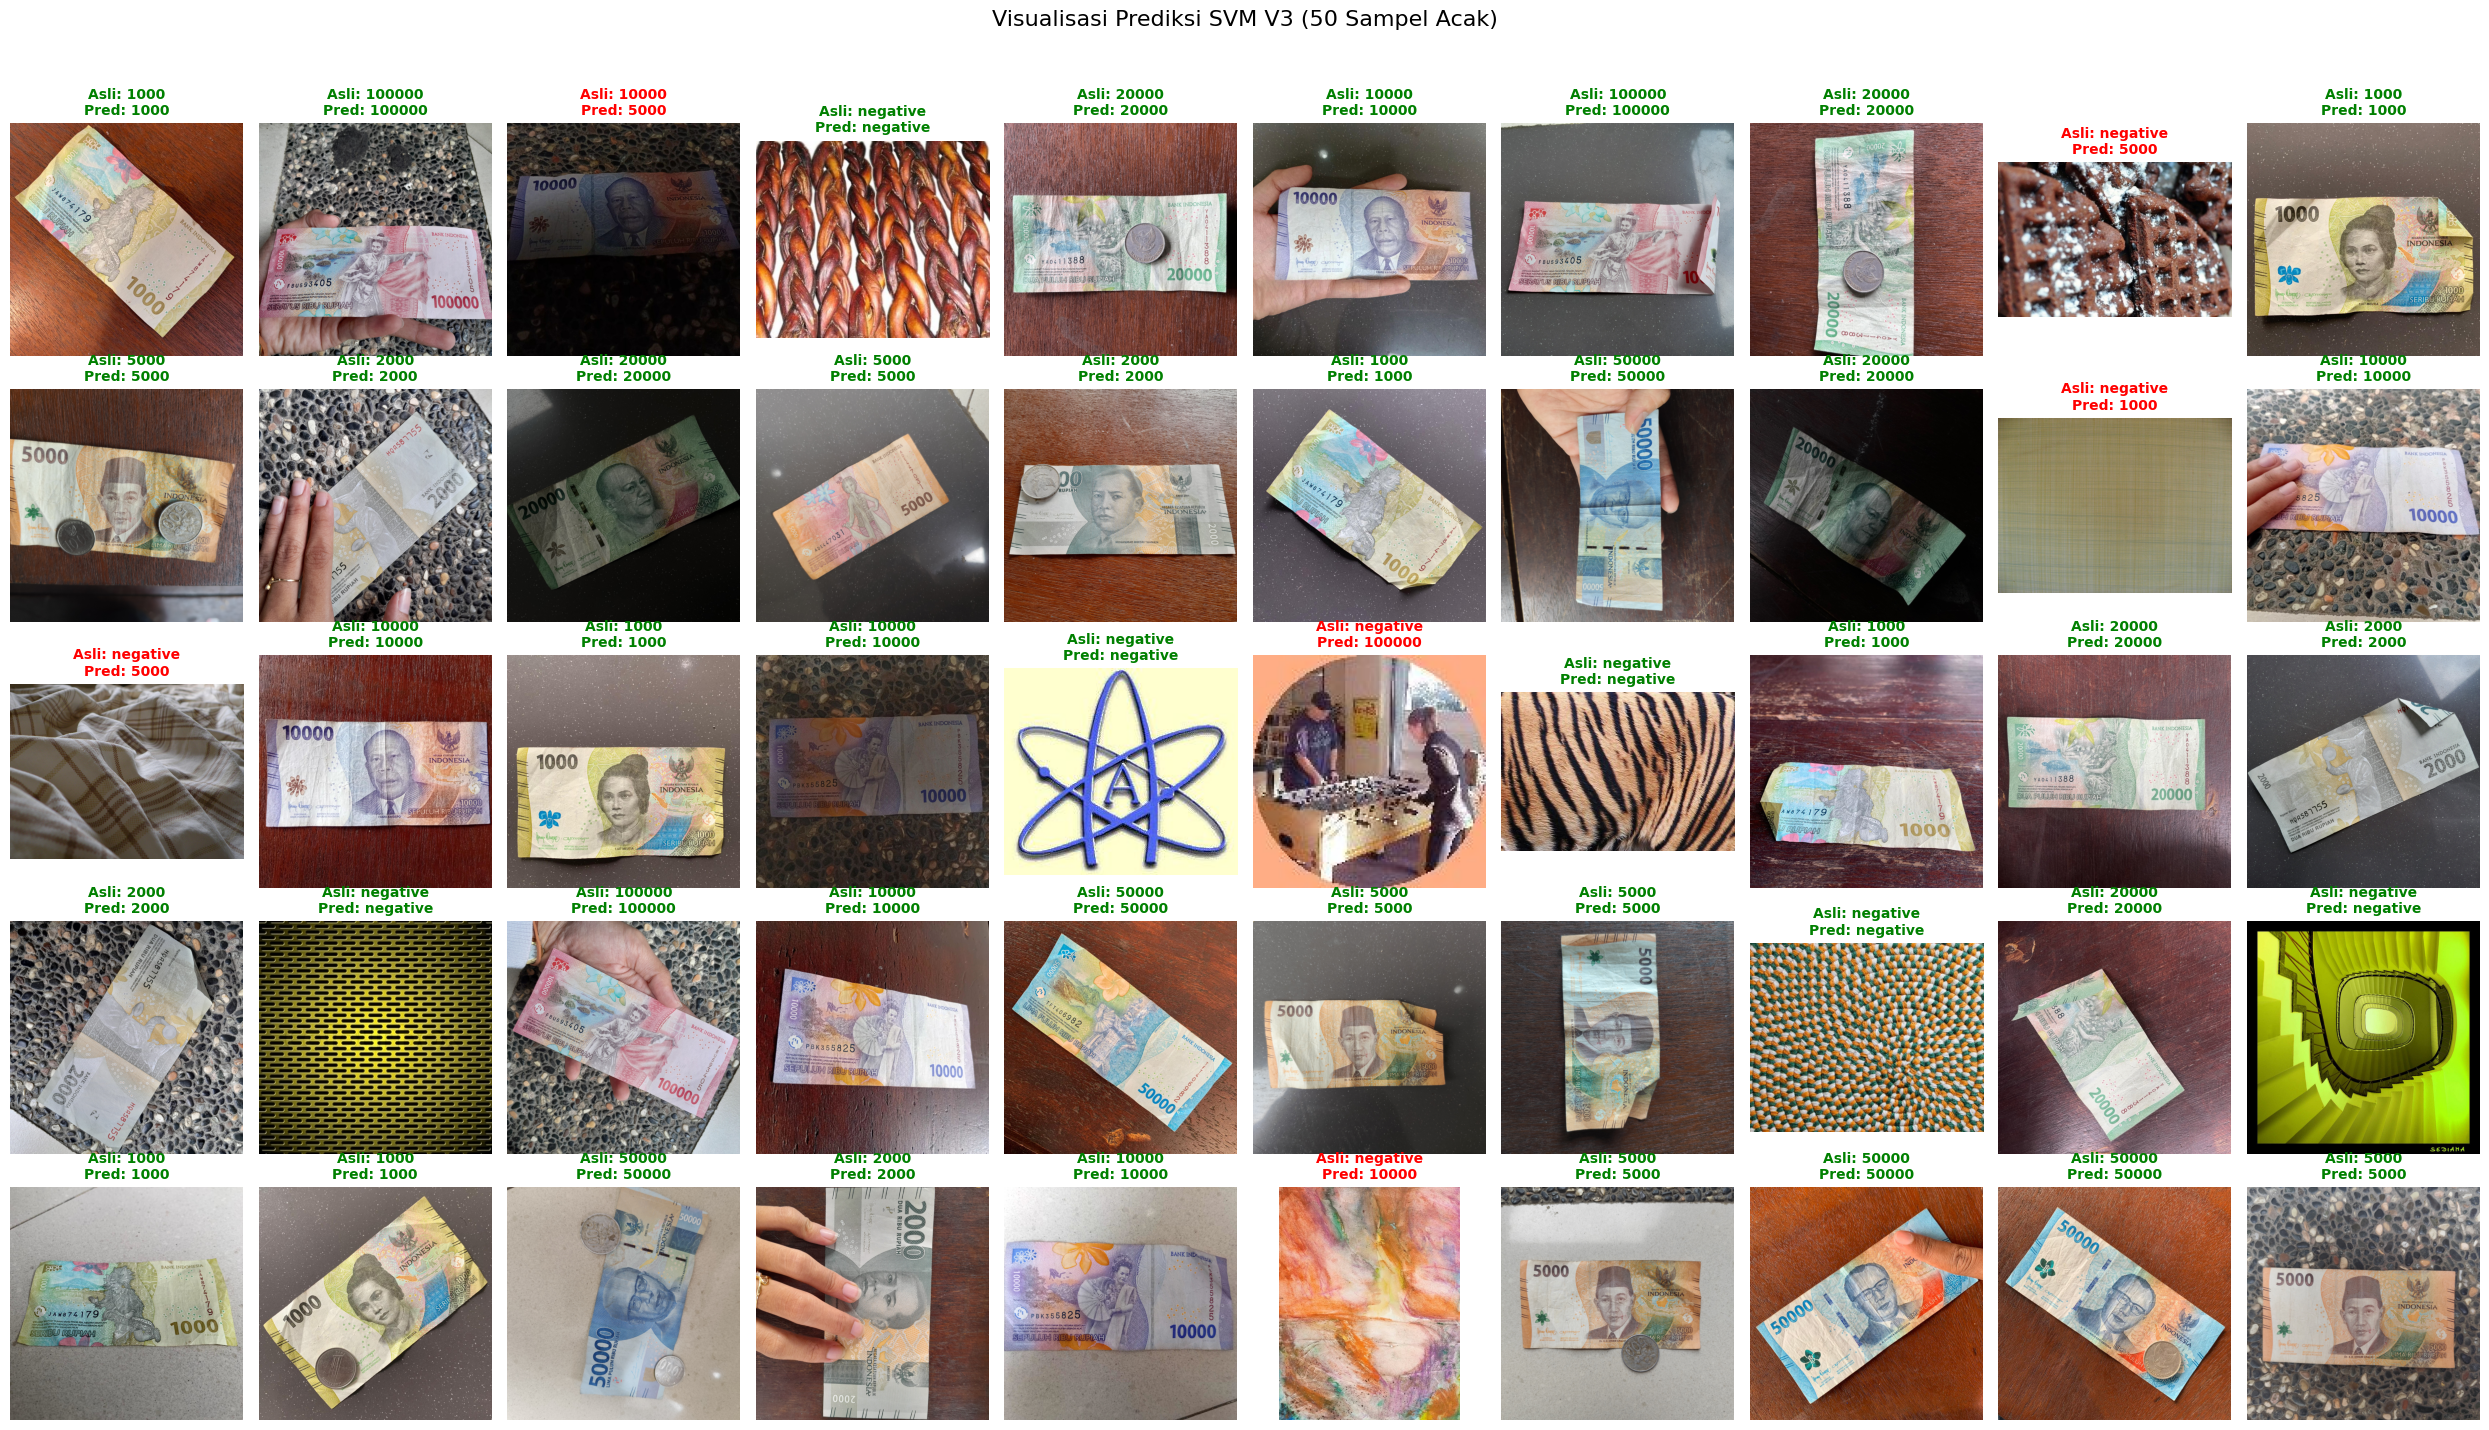

In [11]:
y_pred = best_model.predict(X_test_scaled)

print("\n--- Laporan Klasifikasi SVM V3 ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# --- FUNGSI VISUALISASI ---
def visualize_predictions(paths, y_true, y_pred, class_names, num_samples=10):
    # Adjust figure size for more samples
    rows = (num_samples + 9) // 10 # Calculate rows needed for 10 columns
    cols = 10
    plt.figure(figsize=(25, 3 * rows)) # Adjust figure height based on rows
    plt.suptitle(f"Visualisasi Prediksi SVM V3 ({num_samples} Sampel Acak)", fontsize=16)

    # Ambil indeks acak
    indices = np.random.choice(len(paths), min(len(paths), num_samples), replace=False)

    for i, idx in enumerate(indices):
        path = paths[idx]
        true_lbl = class_names[y_true[idx]]
        pred_lbl = class_names[y_pred[idx]]

        # Baca gambar
        img = cv2.imread(path)
        if img is None: continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Tentukan warna teks (Hijau=Benar, Merah=Salah)
        color = 'green' if true_lbl == pred_lbl else 'red'

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Asli: {true_lbl}\nPred: {pred_lbl}", color=color, fontsize=10, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Panggil Visualisasi dengan 50 sampel
visualize_predictions(paths_test, y_test, y_pred, le.classes_, num_samples=50)